In [1]:
#ΕΡΩΤΗΜΑ 1 & 2

import numpy as np
import random as rnd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import fowlkes_mallows_score

#Ορισμός του seed παραγωγής τυχαίων αριθμών.
run_with_seed = 28547520 #np.random.randint(0, 4294967295)
np.random.seed(run_with_seed)

(trainingMixedData, trainingMixedLabels), (testSetData, testSetLabels) = tf.keras.datasets.fashion_mnist.load_data()
trainingSetData, valSetData, trainingSetLabels, valSetLabels = train_test_split(trainingMixedData, trainingMixedLabels, test_size=0.1, random_state=1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
#ΕΡΩΤΗΜΑ 3

trainingSetData2D = trainingSetData.reshape(54000, 28 * 28)

pca = PCA(n_components = 0.95)
trainingSetData2DPCA = pca.fit_transform(trainingSetData2D)

In [3]:
#ΕΡΩΤΗΜΑ 4

valSetData2D = valSetData.reshape(6000, 28 * 28)

valSetData2D = pca.transform(valSetData2D)
valSetSata2dInversed = pca.inverse_transform(valSetData2D)

Items from all classes have been included!


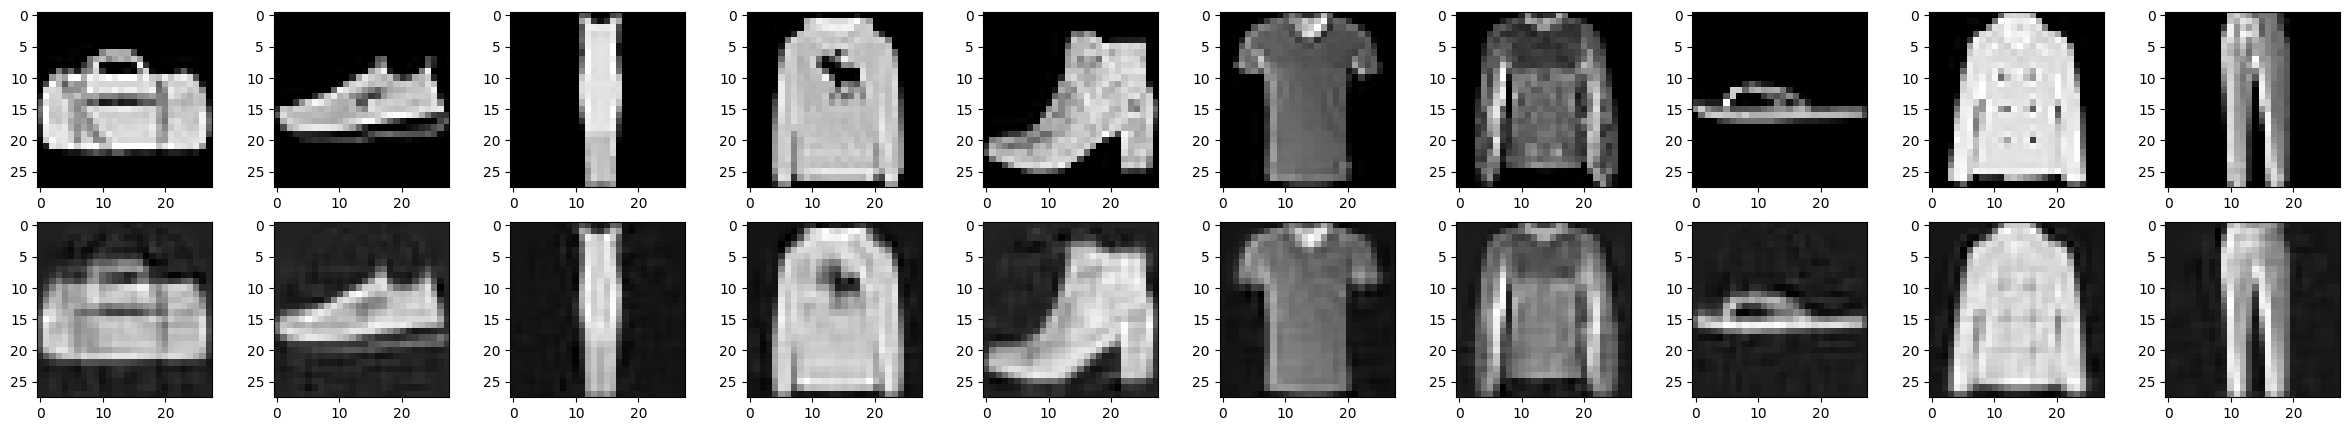

In [4]:
#ΕΡΩΤΗΜΑ 5

clothingType = valSetLabels
originalImages = valSetData
inversedImages = valSetSata2dInversed.reshape(6000, 28, 28)

rng = np.random.default_rng(seed = 674)
randomClothes = rng.integers(0, 6000, 30)

p, images = plt.subplots(2, 10, figsize=(30, 5))
index = 0
y = 0

classes_to_find = [0,1,2,3,4,5,6,7,8,9]

while index < 30:
  chosenClothing = randomClothes[index]
  class_label = clothingType[chosenClothing]
  index = index + 1
  if class_label in classes_to_find:
    classes_to_find.remove(class_label)
    images[0, y].imshow(originalImages[chosenClothing], cmap="gray")
    images[1, y].imshow(inversedImages[chosenClothing], cmap="gray")
    y = y + 1
  if len(classes_to_find) == 0:
    print('Items from all classes have been included!')
    break
plt.show()

In [5]:
#ΕΡΩΤΗΜΑ 6

testSetData2D = testSetData.reshape(10000, 28 * 28)
testSetData2dPCA = pca.transform(testSetData2D)

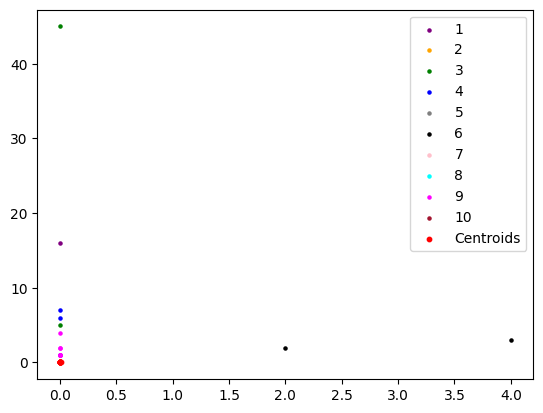


The Silhouette Score for Kmeans Clustering is:  -0.09675018053577646
The Calinski and Harabasz score for KMeans CLustering is:  1999.1383830867528
The Davies and Bouldin score for KMeans CLustering is:  7.436708025176008
The Fowlkes-Mallows score for KMeans Clustering is:  0.4256815634996964




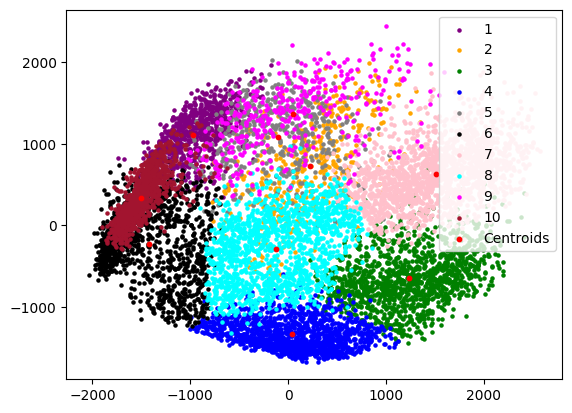


The Silhouette Score for Kmeans Clustering is:  -0.09613418344996898
The Calinski and Harabasz score for KMeans CLustering is:  1994.6551798512846
The Davies and Bouldin score for KMeans CLustering is:  7.516690693813172
The Fowlkes-Mallows score for KMeans Clustering is:  0.42254395516346094


In [6]:
#ΕΡΩΤΗΜΑ 7 & 8 & 9

#Kmeans Clustering

kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans = kmeans.fit(testSetData2D)
predictionKMeans = kmeans.predict(testSetData2D)

plt.scatter(testSetData2D[predictionKMeans == 0, 0], testSetData2D[predictionKMeans == 0, 1], s = 5, c = 'purple', label = '1')
plt.scatter(testSetData2D[predictionKMeans == 1, 0], testSetData2D[predictionKMeans == 1, 1], s = 5, c = 'orange', label = '2')
plt.scatter(testSetData2D[predictionKMeans == 2, 0], testSetData2D[predictionKMeans == 2, 1], s = 5, c = 'green', label = '3')
plt.scatter(testSetData2D[predictionKMeans == 3, 0], testSetData2D[predictionKMeans == 3, 1], s = 5, c = 'blue', label = '4')
plt.scatter(testSetData2D[predictionKMeans == 4, 0], testSetData2D[predictionKMeans == 4, 1], s = 5, c = 'grey', label = '5')
plt.scatter(testSetData2D[predictionKMeans == 5, 0], testSetData2D[predictionKMeans == 5, 1], s = 5, c = 'black', label = '6')
plt.scatter(testSetData2D[predictionKMeans == 6, 0], testSetData2D[predictionKMeans == 6, 1], s = 5, c = 'pink', label = '7')
plt.scatter(testSetData2D[predictionKMeans == 7, 0], testSetData2D[predictionKMeans == 7, 1], s = 5, c = 'cyan', label = '8')
plt.scatter(testSetData2D[predictionKMeans == 8, 0], testSetData2D[predictionKMeans == 8, 1], s = 5, c = 'magenta', label = '9')
plt.scatter(testSetData2D[predictionKMeans == 9, 0], testSetData2D[predictionKMeans == 9, 1], s = 5, c = '#A2142F', label = '10')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 10, c = 'red', label = 'Centroids')
plt.legend(), print("\n"), plt.show()

silhouetteScoreKMeans = silhouette_score(testSetLabels.reshape(-1, 1), kmeans.labels_)
CalHaraKMeans = calinski_harabasz_score(testSetLabels.reshape(-1, 1), kmeans.labels_)
davBKMeans = davies_bouldin_score(testSetLabels.reshape(-1, 1), kmeans.labels_)
fowlMallowsKMeans = fowlkes_mallows_score(testSetLabels, kmeans.labels_)

print("\nThe Silhouette Score for Kmeans Clustering is: ", silhouetteScoreKMeans)
print("The Calinski and Harabasz score for KMeans CLustering is: ", CalHaraKMeans)
print("The Davies and Bouldin score for KMeans CLustering is: ", davBKMeans)
print("The Fowlkes-Mallows score for KMeans Clustering is: ", fowlMallowsKMeans)

################################################################################################################

kmeans = KMeans(n_clusters = 10, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans = kmeans.fit(testSetData2dPCA)
predictionKMeans = kmeans.predict(testSetData2dPCA)

plt.scatter(testSetData2dPCA[predictionKMeans == 0, 0], testSetData2dPCA[predictionKMeans == 0, 1], s = 5, c = 'purple', label = '1')
plt.scatter(testSetData2dPCA[predictionKMeans == 1, 0], testSetData2dPCA[predictionKMeans == 1, 1], s = 5, c = 'orange', label = '2')
plt.scatter(testSetData2dPCA[predictionKMeans == 2, 0], testSetData2dPCA[predictionKMeans == 2, 1], s = 5, c = 'green', label = '3')
plt.scatter(testSetData2dPCA[predictionKMeans == 3, 0], testSetData2dPCA[predictionKMeans == 3, 1], s = 5, c = 'blue', label = '4')
plt.scatter(testSetData2dPCA[predictionKMeans == 4, 0], testSetData2dPCA[predictionKMeans == 4, 1], s = 5, c = 'grey', label = '5')
plt.scatter(testSetData2dPCA[predictionKMeans == 5, 0], testSetData2dPCA[predictionKMeans == 5, 1], s = 5, c = 'black', label = '6')
plt.scatter(testSetData2dPCA[predictionKMeans == 6, 0], testSetData2dPCA[predictionKMeans == 6, 1], s = 5, c = 'pink', label = '7')
plt.scatter(testSetData2dPCA[predictionKMeans == 7, 0], testSetData2dPCA[predictionKMeans == 7, 1], s = 5, c = 'cyan', label = '8')
plt.scatter(testSetData2dPCA[predictionKMeans == 8, 0], testSetData2dPCA[predictionKMeans == 8, 1], s = 5, c = 'magenta', label = '9')
plt.scatter(testSetData2dPCA[predictionKMeans == 9, 0], testSetData2dPCA[predictionKMeans == 9, 1], s = 5, c = '#A2142F', label = '10')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 10, c = 'red', label = 'Centroids')
plt.legend(), print("\n"), plt.show()

silhouetteScoreKMeans = silhouette_score(testSetLabels.reshape(-1, 1), kmeans.labels_)
CalHaraKMeans = calinski_harabasz_score(testSetLabels.reshape(-1, 1), kmeans.labels_)
davBKMeans = davies_bouldin_score(testSetLabels.reshape(-1, 1), kmeans.labels_)
fowlMallowsKMeans = fowlkes_mallows_score(testSetLabels, kmeans.labels_)

print("\nThe Silhouette Score for Kmeans Clustering is: ", silhouetteScoreKMeans)
print("The Calinski and Harabasz score for KMeans CLustering is: ", CalHaraKMeans)
print("The Davies and Bouldin score for KMeans CLustering is: ", davBKMeans)
print("The Fowlkes-Mallows score for KMeans Clustering is: ", fowlMallowsKMeans)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


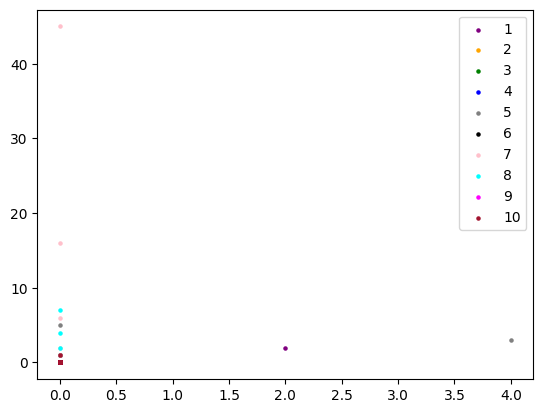


The Silhouette Score for Spectral Clustering is:  -0.03933665397397722
The Calinski and Harabasz score for Spectral Clustering is:  2.1180438155861583
The Davies and Bouldin score for Spectral Clustering is:  885.5387261402964
The Fowlkes-Mallows score for Spectral Clustering is:  0.10144494523063015


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


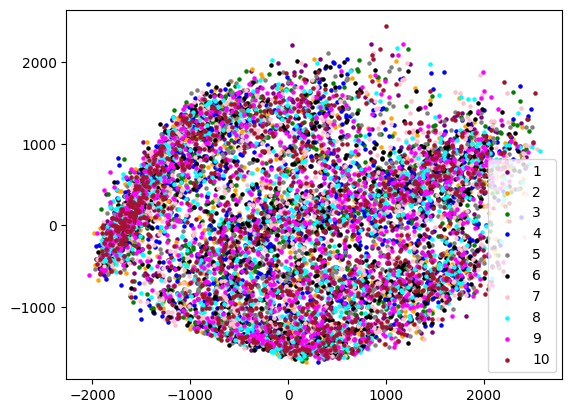


The Silhouette Score for Spectral Clustering is:  -0.03325680211293886
The Calinski and Harabasz score for Spectral Clustering is:  0.8063766060462509
The Davies and Bouldin score for Spectral Clustering is:  847.6408887885118
The Fowlkes-Mallows score for Spectral Clustering is:  0.10043654650763399


In [7]:
#Spectral Clustering

spClustering = SpectralClustering(n_clusters = 10, assign_labels = 'discretize', random_state = 0)
predictionSPC = spClustering.fit_predict(testSetData2D)

plt.scatter(testSetData2D[predictionSPC == 0, 0], testSetData2D[predictionSPC == 0, 1], s = 5, c = 'purple', label = '1')
plt.scatter(testSetData2D[predictionSPC == 1, 0], testSetData2D[predictionSPC == 1, 1], s = 5, c = 'orange', label = '2')
plt.scatter(testSetData2D[predictionSPC == 2, 0], testSetData2D[predictionSPC == 2, 1], s = 5, c = 'green', label = '3')
plt.scatter(testSetData2D[predictionSPC == 3, 0], testSetData2D[predictionSPC == 3, 1], s = 5, c = 'blue', label = '4')
plt.scatter(testSetData2D[predictionSPC == 4, 0], testSetData2D[predictionSPC == 4, 1], s = 5, c = 'grey', label = '5')
plt.scatter(testSetData2D[predictionSPC == 5, 0], testSetData2D[predictionSPC == 5, 1], s = 5, c = 'black', label = '6')
plt.scatter(testSetData2D[predictionSPC == 6, 0], testSetData2D[predictionSPC == 6, 1], s = 5, c = 'pink', label = '7')
plt.scatter(testSetData2D[predictionSPC == 7, 0], testSetData2D[predictionSPC == 7, 1], s = 5, c = 'cyan', label = '8')
plt.scatter(testSetData2D[predictionSPC == 8, 0], testSetData2D[predictionSPC == 8, 1], s = 5, c = 'magenta', label = '9')
plt.scatter(testSetData2D[predictionSPC == 9, 0], testSetData2D[predictionSPC == 9, 1], s = 5, c = '#A2142F', label = '10')
plt.legend(), plt.show()

silhouetteScoreSpClustering = silhouette_score(testSetLabels.reshape(-1, 1), spClustering.labels_)
CalHaraSpClustering = calinski_harabasz_score(testSetLabels.reshape(-1, 1), spClustering.labels_)
davBSpClustering = davies_bouldin_score(testSetLabels.reshape(-1, 1), spClustering.labels_)
fowlMallowsSpClustering = fowlkes_mallows_score(testSetLabels, spClustering.labels_)

print("\nThe Silhouette Score for Spectral Clustering is: ", silhouetteScoreSpClustering)
print("The Calinski and Harabasz score for Spectral Clustering is: ", CalHaraSpClustering)
print("The Davies and Bouldin score for Spectral Clustering is: ", davBSpClustering)
print("The Fowlkes-Mallows score for Spectral Clustering is: ", fowlMallowsSpClustering)

####################################################################################################

spClustering = SpectralClustering(n_clusters = 10, assign_labels = 'discretize', random_state = 0)
predictionSPC = spClustering.fit_predict(testSetData2dPCA)

plt.scatter(testSetData2dPCA[predictionSPC == 0, 0], testSetData2dPCA[predictionSPC == 0, 1], s = 5, c = 'purple', label = '1')
plt.scatter(testSetData2dPCA[predictionSPC == 1, 0], testSetData2dPCA[predictionSPC == 1, 1], s = 5, c = 'orange', label = '2')
plt.scatter(testSetData2dPCA[predictionSPC == 2, 0], testSetData2dPCA[predictionSPC == 2, 1], s = 5, c = 'green', label = '3')
plt.scatter(testSetData2dPCA[predictionSPC == 3, 0], testSetData2dPCA[predictionSPC == 3, 1], s = 5, c = 'blue', label = '4')
plt.scatter(testSetData2dPCA[predictionSPC == 4, 0], testSetData2dPCA[predictionSPC == 4, 1], s = 5, c = 'grey', label = '5')
plt.scatter(testSetData2dPCA[predictionSPC == 5, 0], testSetData2dPCA[predictionSPC == 5, 1], s = 5, c = 'black', label = '6')
plt.scatter(testSetData2dPCA[predictionSPC == 6, 0], testSetData2dPCA[predictionSPC == 6, 1], s = 5, c = 'pink', label = '7')
plt.scatter(testSetData2dPCA[predictionSPC == 7, 0], testSetData2dPCA[predictionSPC == 7, 1], s = 5, c = 'cyan', label = '8')
plt.scatter(testSetData2dPCA[predictionSPC == 8, 0], testSetData2dPCA[predictionSPC == 8, 1], s = 5, c = 'magenta', label = '9')
plt.scatter(testSetData2dPCA[predictionSPC == 9, 0], testSetData2dPCA[predictionSPC == 9, 1], s = 5, c = '#A2142F', label = '10')
plt.legend(), plt.show()

silhouetteScoreSpClustering = silhouette_score(testSetLabels.reshape(-1, 1), spClustering.labels_)
CalHaraSpClustering = calinski_harabasz_score(testSetLabels.reshape(-1, 1), spClustering.labels_)
davBSpClustering = davies_bouldin_score(testSetLabels.reshape(-1, 1), spClustering.labels_)
fowlMallowsSpClustering = fowlkes_mallows_score(testSetLabels, spClustering.labels_)

print("\nThe Silhouette Score for Spectral Clustering is: ", silhouetteScoreSpClustering)
print("The Calinski and Harabasz score for Spectral Clustering is: ", CalHaraSpClustering)
print("The Davies and Bouldin score for Spectral Clustering is: ", davBSpClustering)
print("The Fowlkes-Mallows score for Spectral Clustering is: ", fowlMallowsSpClustering)

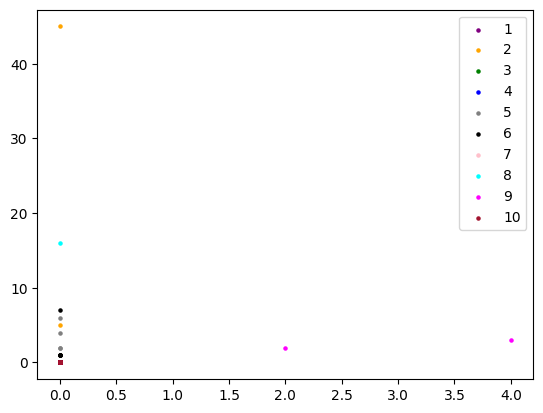


The Silhouette Score for Gaussian Mixture is:  -0.09623458236975133
The Calinski and Harabasz score for Gaussian Mixture is:  2104.2368917940557
The Davies and Bouldin score for Gaussian Mixture is:  9.094701352177061
The Fowlkes-Mallows score for Gaussian Mixture is:  0.40980352641347534


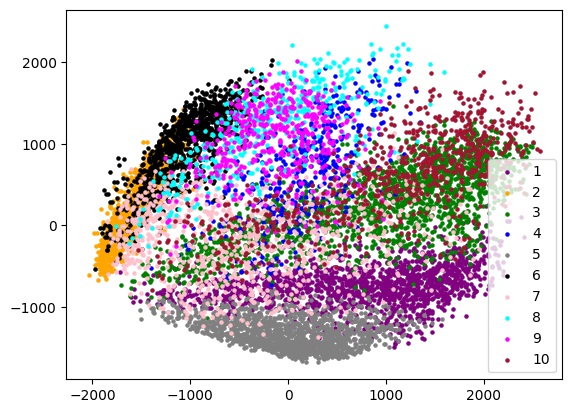


The Silhouette Score for Gaussian Mixture is:  -0.09887892546470528
The Calinski and Harabasz score for Gaussian Mixture is:  2121.269604814275
The Davies and Bouldin score for Gaussian Mixture is:  49.584527645650624
The Fowlkes-Mallows score for Gaussian Mixture is:  0.45066488469025684


In [8]:
#Gaussian Mixture

gMix = GaussianMixture(n_components = 10, random_state = 0)
gMix = gMix.fit(testSetData2D)
predictionGMixture = gMix.predict(testSetData2D)

plt.scatter(testSetData2D[predictionGMixture == 0, 0], testSetData2D[predictionGMixture == 0, 1], s = 5, c = 'purple', label = '1')
plt.scatter(testSetData2D[predictionGMixture == 1, 0], testSetData2D[predictionGMixture == 1, 1], s = 5, c = 'orange', label = '2')
plt.scatter(testSetData2D[predictionGMixture == 2, 0], testSetData2D[predictionGMixture == 2, 1], s = 5, c = 'green', label = '3')
plt.scatter(testSetData2D[predictionGMixture == 3, 0], testSetData2D[predictionGMixture == 3, 1], s = 5, c = 'blue', label = '4')
plt.scatter(testSetData2D[predictionGMixture == 4, 0], testSetData2D[predictionGMixture == 4, 1], s = 5, c = 'grey', label = '5')
plt.scatter(testSetData2D[predictionGMixture == 5, 0], testSetData2D[predictionGMixture == 5, 1], s = 5, c = 'black', label = '6')
plt.scatter(testSetData2D[predictionGMixture == 6, 0], testSetData2D[predictionGMixture == 6, 1], s = 5, c = 'pink', label = '7')
plt.scatter(testSetData2D[predictionGMixture == 7, 0], testSetData2D[predictionGMixture == 7, 1], s = 5, c = 'cyan', label = '8')
plt.scatter(testSetData2D[predictionGMixture == 8, 0], testSetData2D[predictionGMixture == 8, 1], s = 5, c = 'magenta', label = '9')
plt.scatter(testSetData2D[predictionGMixture == 9, 0], testSetData2D[predictionGMixture == 9, 1], s = 5, c = '#A2142F', label = '10')
plt.legend(), plt.show()

silhouetteScoreGM = silhouette_score(testSetLabels.reshape(-1, 1), predictionGMixture)
CalHaraGMixture = calinski_harabasz_score(testSetLabels.reshape(-1, 1), predictionGMixture)
davBGMixture = davies_bouldin_score(testSetLabels.reshape(-1, 1), predictionGMixture)
fowlMallowsGMixture = fowlkes_mallows_score(testSetLabels, predictionGMixture)

print("\nThe Silhouette Score for Gaussian Mixture is: ", silhouetteScoreGM)
print("The Calinski and Harabasz score for Gaussian Mixture is: ", CalHaraGMixture)
print("The Davies and Bouldin score for Gaussian Mixture is: ", davBGMixture)
print("The Fowlkes-Mallows score for Gaussian Mixture is: ", fowlMallowsGMixture)

#########################################################################################################

gMix = GaussianMixture(n_components = 10, random_state = 0)
gMix = gMix.fit(testSetData2dPCA)
predictionGMixture = gMix.predict(testSetData2dPCA)

plt.scatter(testSetData2dPCA[predictionGMixture == 0, 0], testSetData2dPCA[predictionGMixture == 0, 1], s = 5, c = 'purple', label = '1')
plt.scatter(testSetData2dPCA[predictionGMixture == 1, 0], testSetData2dPCA[predictionGMixture == 1, 1], s = 5, c = 'orange', label = '2')
plt.scatter(testSetData2dPCA[predictionGMixture == 2, 0], testSetData2dPCA[predictionGMixture == 2, 1], s = 5, c = 'green', label = '3')
plt.scatter(testSetData2dPCA[predictionGMixture == 3, 0], testSetData2dPCA[predictionGMixture == 3, 1], s = 5, c = 'blue', label = '4')
plt.scatter(testSetData2dPCA[predictionGMixture == 4, 0], testSetData2dPCA[predictionGMixture == 4, 1], s = 5, c = 'grey', label = '5')
plt.scatter(testSetData2dPCA[predictionGMixture == 5, 0], testSetData2dPCA[predictionGMixture == 5, 1], s = 5, c = 'black', label = '6')
plt.scatter(testSetData2dPCA[predictionGMixture == 6, 0], testSetData2dPCA[predictionGMixture == 6, 1], s = 5, c = 'pink', label = '7')
plt.scatter(testSetData2dPCA[predictionGMixture == 7, 0], testSetData2dPCA[predictionGMixture == 7, 1], s = 5, c = 'cyan', label = '8')
plt.scatter(testSetData2dPCA[predictionGMixture == 8, 0], testSetData2dPCA[predictionGMixture == 8, 1], s = 5, c = 'magenta', label = '9')
plt.scatter(testSetData2dPCA[predictionGMixture == 9, 0], testSetData2dPCA[predictionGMixture == 9, 1], s = 5, c = '#A2142F', label = '10')
plt.legend(), plt.show()

silhouetteScoreGM = silhouette_score(testSetLabels.reshape(-1, 1), predictionGMixture)
CalHaraGMixture = calinski_harabasz_score(testSetLabels.reshape(-1, 1), predictionGMixture)
davBGMixture = davies_bouldin_score(testSetLabels.reshape(-1, 1), predictionGMixture)
fowlMallowsGMixture = fowlkes_mallows_score(testSetLabels, predictionGMixture)

print("\nThe Silhouette Score for Gaussian Mixture is: ", silhouetteScoreGM)
print("The Calinski and Harabasz score for Gaussian Mixture is: ", CalHaraGMixture)
print("The Davies and Bouldin score for Gaussian Mixture is: ", davBGMixture)
print("The Fowlkes-Mallows score for Gaussian Mixture is: ", fowlMallowsGMixture)